In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.combine import SMOTEENN
import pickle

In [2]:
data = pd.read_csv("Telco-customer-churn(cleaned).csv")

In [3]:
data.head()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,0,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,1,Male,No,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,2,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,3,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,4,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [4]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [7]:
le = LabelEncoder()
data['Churn'] = le.fit_transform(data['Churn'])

In [8]:
one_hot_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                'Contract', 'PaperlessBilling', 'PaymentMethod', 'tenure_group']

data = pd.get_dummies(data, columns=one_hot_cols, drop_first=True, dtype=np.int32)

In [9]:
X = data.drop(columns=['Churn'])
y = data['Churn']

In [10]:
from collections import Counter
Counter(y)

Counter({0: 5163, 1: 1869})

dataset is imbalanced so we need to make it balanced

In [12]:
sm =  SMOTEENN(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X,y)

In [13]:
Counter(y_resampled)

Counter({0: 2655, 1: 3161})

In [14]:
# split dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=42, test_size=0.2)

In [15]:
# Hyper parameter tunning
param_grid = {'n_estimators':[100, 200, 300], 
              'max_depth':[10, 20, None], 
              'min_samples_split':[2,5,10], 
              'min_samples_leaf':[1,2,4]}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [16]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [17]:
print("Best Parameters:", grid_search.best_params_)
print("\nClassification Report:\n",classification_report(y_test, y_pred))
print("\nCofusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95       553
           1       0.95      0.97      0.96       611

    accuracy                           0.96      1164
   macro avg       0.96      0.96      0.96      1164
weighted avg       0.96      0.96      0.96      1164


Cofusion Matrix:
 [[520  33]
 [ 18 593]]
Accuracy: 0.9561855670103093


# Model Explainability with SHAP

In [151]:
import shap
import matplotlib.pyplot as plt

In [196]:
explainer = shap.Explainer(best_model, X_test)
shap_values = explainer(X_test)

100%|===================| 2318/2328 [01:58<00:00]        

SHAP Summary Plot (Global Feature Importance):


<Figure size 800x400 with 0 Axes>

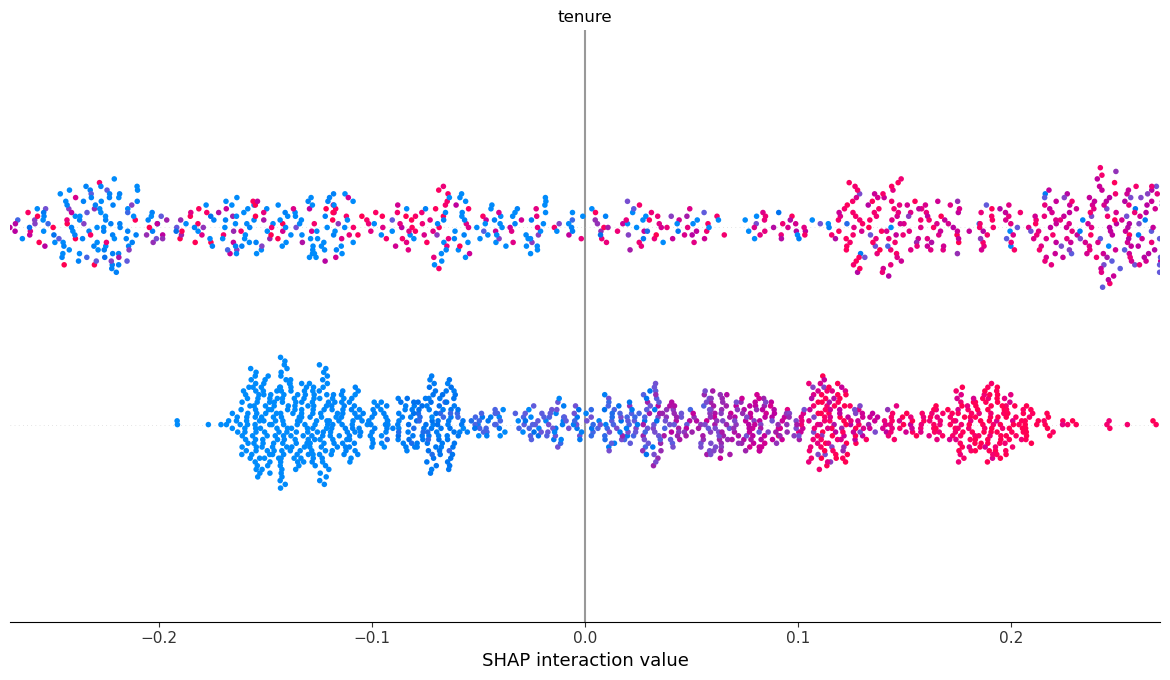

In [198]:
plt.figure(figsize=(8,4))
print("SHAP Summary Plot (Global Feature Importance):")
shap.summary_plot(shap_values, X_test)

SHAP Beeswarm Plot for Class 1 (Churn):


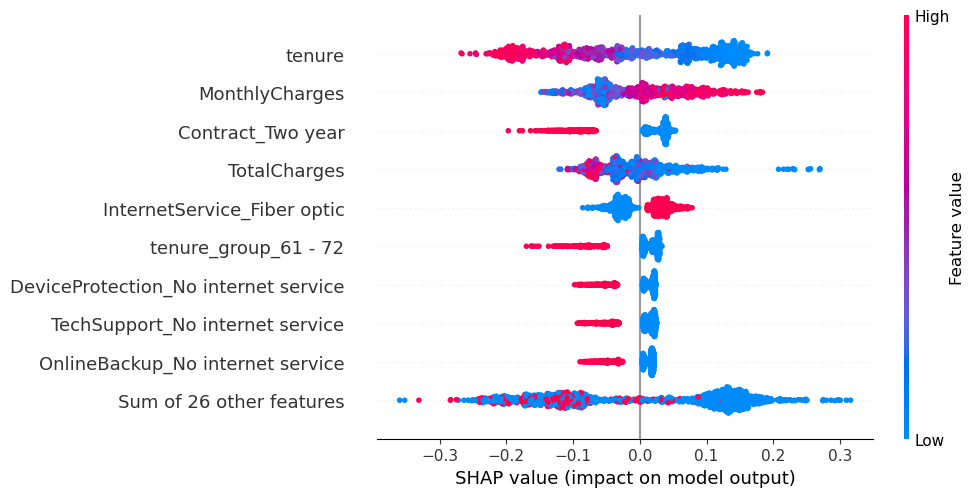

In [208]:
print("SHAP Beeswarm Plot for Class 1 (Churn):")
shap.plots.beeswarm(shap_values[..., 1])

SHAP Bar Plot for Class 1 (Churn):


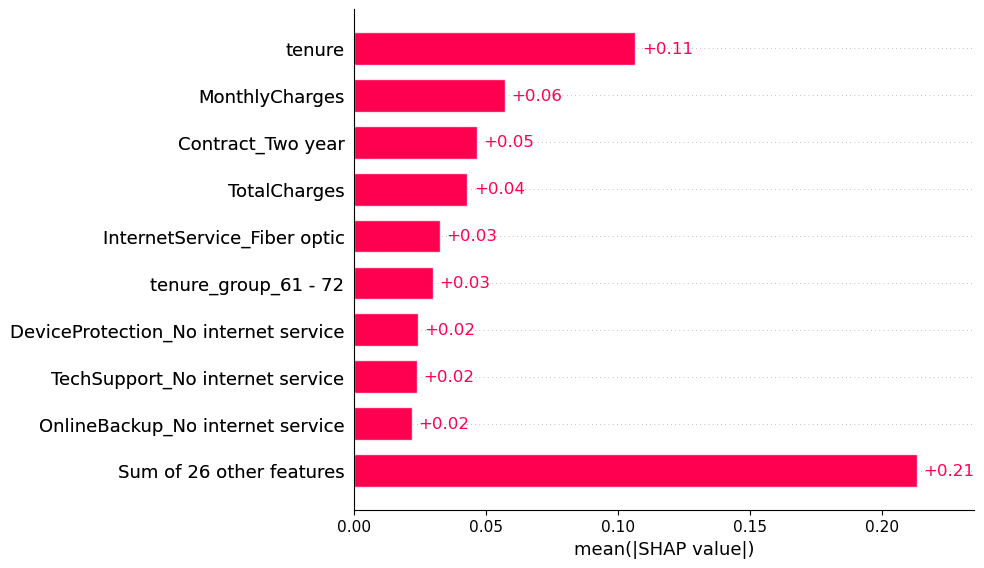

In [212]:
print("SHAP Bar Plot for Class 1 (Churn):")
shap.plots.bar(shap_values[...,1])

In [ ]:
# with open("Churn_model.pkl", "wb") as f:
#     pickle.dump(best_model, f)

In [ ]:
# with open("trained_columns.pkl", "wb") as f:
#     pickle.dump(pd.DataFrame(X_train).columns.tolist(), f)